In [49]:
def out_of_bounds(i, j, maze):
    return i < 0 or j < 0 or i >= len(maze) or j >= len(maze[0])

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

class Node():
    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    def __init__(self, pos: tuple[int, int]):
        self.pos = pos
        self.visited = False
        self.distance = float('inf') if pos != (0, 0) else 0
        self.neighbors = []
        
    def __add__(self, move: tuple[int, int]) -> tuple[int, int]:
        return self.pos[0] + move[0], self.pos[1] + move[1]
    
    def __eq__(self, other):
        # if other is not a node, return false
        if not isinstance(other, Node):
            return False
        return self.pos == other.pos
    
    def __lt__(self, other):
        self.pos < other.pos
    
    def __str__(self):
        return f'{self.pos}'
    
    def __repr__(self):
        return self.__str__()
    
    def __hash__(self):
        return hash(self.pos)

class Maze():
    def __init__(self, maze: np.ndarray[np.ndarray[Node]]):
        self.maze = maze
        self.start_pos = (0, 0)
        self.end_pos = (maze.shape[0] - 1, maze.shape[1] - 1)

    def djikstra(self):
        self.set_neighbors()
        queue = []
        heapq.heappush(queue, (0, self.maze[self.start_pos[0]][self.start_pos[1]]))

        while len(queue) > 0:
            dist, node = heapq.heappop(queue)
            if node.visited:
                continue

            node.visited = True
            if node.pos == self.end_pos:
                return dist

            for neighbor in node.neighbors:
                if not neighbor.visited:
                    heapq.heappush(queue, (dist + 1, neighbor))
            
        return -1
    
    def set_neighbors(self):
        for i in range(self.maze.shape[0]):
            for j in range(self.maze.shape[1]):
                if self.maze[i][j] == 0:
                    continue

                self.maze[i][j].neighbors = self.get_legal_moves(self.maze[i][j])

    def get_legal_moves(self, node: Node) -> list[Node]:
        # can move up down left right
        n_moves = []
        for move in Node.moves:
            new_pos = node + move
            if not out_of_bounds(new_pos[0], new_pos[1], self.maze):
                n_node = self.maze[new_pos[0]][new_pos[1]]
                if n_node != 0:
                    n_moves.append(self.maze[new_pos[0]][new_pos[1]])

        return n_moves
                

    def plot(self, highlight_coord = None):
        plt.imshow([[0 if self.maze[i][j] == 0 else 1 for j in range(len(self.maze))] for i in range(len(self.maze[0]))])
        plt.scatter(self.start_pos[0], self.start_pos[1], c='r', marker='4', s=60)
        plt.scatter(self.end_pos[0], self.end_pos[1], c='g', marker='8', s=60)
        if highlight_coord:
            plt.scatter(highlight_coord[0], highlight_coord[1], c='y', marker='x', s=120)
        plt.show()
            
    def __str__(self):
        s = ''
        for i in range(len(self.maze)):
            for j in range(len(self.maze[0])):
                if i < len(self.maze) and j < len(self.maze[i]):
                    if self.maze[i][j] == 0:
                        s += '#'
                    elif self.maze[i][j] == 1:
                        s += '.'
            s += '\n'

        return s


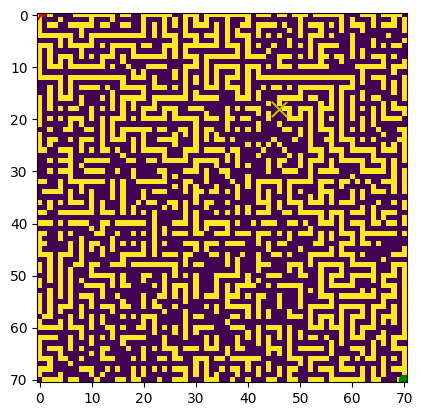

last coord: (46, 18)
-1


In [52]:
def simulate(filename: str, bytes: int, size: int):
    maze = np.ones((size, size), dtype=Node)
    with open(filename) as f:
        i = 0
        coords = []
        for line in f.readlines():
            if i > bytes:
                break
            coord = line.strip().split(',')
            coords.append((int(coord[0]), int(coord[1])))
            i += 1

        for i in range(len(coords) - 1):
            x, y = coords[i]
            maze[y][x] = 0 # wall

        for i in range(maze.shape[0]):
            for j in range(maze.shape[1]):
                if maze[i][j] != 0: # not initialized
                    maze[i][j] = Node((i, j)) # regular node

    return (Maze(maze), coords)

# maze = simulate('input.txt', 1024, 71)

o = 0
i = 1792
# i = 18
while o != -1:
    i += 1
    # maze, coords = simulate('example.txt', i, 7)
    maze, coords = simulate('input.txt', i, 71)
    o = maze.djikstra()
    if o == -1:
        maze.plot(coords[-2])
        print(f"last coord: {coords[-2]}")

print(maze.djikstra())
